In [2]:
import gensim
import os
from distutils.version import LooseVersion, StrictVersion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re

In [3]:
# dir_path=os.path.dirname('D:/Ki7/PBL6/')
# print(dir_path)
# model = dir_path + '/wiki.vi.model.bin'

In [4]:
# if os.path.isfile(model):
#     word2vec_model  = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
# else: print("No")

In [5]:
# word2vec_model.key_to_index
# word2vec_model['đảng']
# word2vec_model.evaluate_word_analogies
# word2vec_model.get_index('mèo')
# vector = word2vec_model.get_vector('office', norm=True)
# vector.shape

In [6]:
from gensim.models import Word2Vec

In [7]:
skipgram = Word2Vec.load('skipgram_400.bin')

In [8]:
print(skipgram.wv['cộng_sản'])

[-3.70163858e-01 -3.31106722e-01 -2.35302076e-01  1.59370989e-01
  1.94755688e-01 -9.75020602e-02 -3.67763638e-01  3.87834102e-01
 -1.27237424e-01 -7.44759664e-02 -3.21903139e-01 -5.66082120e-01
 -6.19986296e-01 -5.19812033e-02  2.29523927e-01  2.81616151e-01
 -1.66389704e-01  2.48944834e-01 -1.34661227e-01  2.02390805e-01
  1.53337032e-01 -2.77776301e-01 -8.27220529e-02 -1.62131675e-02
 -2.97658425e-02 -2.33693905e-02 -4.22697157e-01 -2.15118498e-01
 -4.27308768e-01 -2.41023317e-01  2.12151051e-01  2.53123760e-01
  7.06238598e-02 -7.69345369e-03 -2.25564674e-01  9.08237994e-02
 -2.87739545e-01 -9.89735574e-02 -5.58787957e-02 -1.56185880e-01
 -2.67824858e-01 -1.11862384e-01 -1.74782050e-04  1.27378285e-01
 -2.84531862e-01  1.29756540e-01 -3.73072743e-01 -2.61724323e-01
  1.51361227e-01 -4.36707474e-02  5.01866043e-02  5.12591064e-01
 -7.29763955e-02 -4.36228573e-01 -9.10093188e-02  7.63919577e-03
 -1.60190970e-01 -5.76906046e-03 -1.17137127e-01 -1.29762534e-02
  2.90878773e-01 -6.77797

In [9]:
skipgram.wv.most_similar('cộng_sản', topn=5)

[('cs', 0.6261704564094543),
 ('đảng_cộng_sản', 0.58404940366745),
 ('baath', 0.5530807375907898),
 ('cộng_sản_liên_xô', 0.5429332256317139),
 ('đcs', 0.5297978520393372)]

In [10]:
skipgram.wv.most_similar('đảng', topn=5)

[('ðảng', 0.6530534029006958),
 ('đảng_', 0.6175108551979065),
 ('đảng_cs', 0.6105231046676636),
 ('kiện_toàn_bộ_máy', 0.6065214276313782),
 ('ðại_hội_xiii', 0.5998976826667786)]

In [11]:
skipgram.wv.most_similar('đảng_cs', topn=5)

[('phân_liệt', 0.730603039264679),
 ('đcs', 0.7284179925918579),
 ('đcsvn', 0.6981561779975891),
 ('đảng_', 0.6961345076560974),
 ('ðảng_csvn', 0.6865062117576599)]

In [12]:
data = pd.read_csv('news_clean_2.csv')

In [13]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Title,Title_processed,Content,Content_processed,label
0,0,0,Cử tri lo ngại tội phạm gia tăng do ma túy,cử_tri lo_ngại tội_phạm gia_tăng ma_túy,Cử tri kiến nghị mạnh tay hơn với vấn nạn ma t...,cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_...,real
1,1,1,"""Nhiều đại án khiến chúng ta không khỏi giật m...",nhiều đại án giật_mình thất_thoát lớn,"Sáng 31/10, thảo luận ở hội trường về việc th...",sáng 31 10 thảo_luận hội_trường chính_sách phá...,real
2,2,2,"Cần đổi mới mạnh mẽ tư duy, tạo đột phá thúc đ...",cần đổi_mới mạnh_mẽ tư_duy đột_phá thúc_đẩy ph...,"Tham dự có Phó Thủ tướng Lê Minh Khái, Phó Thủ...",tham_dự phó_thủ_tướng lê_minh_khái phó_thủ_tướ...,real
3,3,3,Thủ tướng: Nguồn vốn nhà nước đóng vai trò dẫn...,thủ_tướng vốn nhà_nước đóng vai_trò dẫn_dắt ph...,"Chiều 13/11, Thủ tướng Phạm Minh Chính chủ trì...",chiều 13 11 thủ_tướng phạm_minh_chính chủ_trì ...,real
4,4,4,Tổng bí thư Nguyễn Phú Trọng làm Trưởng ban l...,tổng_bí_thư nguyễn_phú_trọng trưởng_ban lễ_tan...,"Chiều 23.9, Ban Chấp hành Trung ương Đảng Cộn...",chiều 23 9 ban_chấp_hành trung_ương đảng_cộng_...,real


In [14]:
data.Content_processed[0]


'cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_xúc cử_tri xã hòa_minh tội_phạm tội_phạm cướp_giật trộm_cắp gia_tăng nguồn_gốc ma_túy lê_văn_đế cử_tri xã hòa_minh bà_con cử_tri kiến_nghị quốc_hội điều_chỉnh luật ma_túy tội_phạm bệnh_nhân cử_tri đế quốc_hội giải_quyết ngăn_chặn tệ_nạn ma_túy đbqh lên_tiếng điều_chỉnh luật chặn_đứng tệ_nạn mua_bán tàng_trữ ma_túy xã_hội lớp thanh_thiếu_niên cử_tri cao_tuổi xã hòa_minh phát_biểu trao_đổi đbqh lê_quốc_phong 25 6 ảnh quế hà_ông huỳnh_văn_trang chủ_tịch mttq xã hòa_minh luật bất_cập nhắm đối_tượng nhà_ở cán_bộ nhân_viên thu_nhập cử_tri phản_ánh chính_quyền bình_thuận dân tách sổ đất nông_nghiệp 1 000 m2 tinh_thần luật đất_đai chỉnh sửa nông_thôn cử_tri ví_dụ hộ gia_đình nông_thôn 1 000 m2 đất tách chia con_cái canh_tác quy_định tỉnh tách dân luật_khoáng_sản thất_thoát tài_nguyên nguyễn_trường_nhân phó chủ_tịch hđnd xã hòa_minh luật khoáng_sản thất_thoát tài_nguyên khoáng_sản quốc_gia cử_tri điều_chỉnh tăng_cường trách_nhiệm công_tác quản_lý n

In [15]:
stringdata=[]
for i in range(len(data)):
    stringdata.append(str(data.Title_processed[i])+' '+str(data.Content_processed[i]))


In [16]:
stringdata[0]

'cử_tri lo_ngại tội_phạm gia_tăng ma_túy cử_tri kiến_nghị mạnh_tay vấn_nạn ma_túy tiếp_xúc cử_tri xã hòa_minh tội_phạm tội_phạm cướp_giật trộm_cắp gia_tăng nguồn_gốc ma_túy lê_văn_đế cử_tri xã hòa_minh bà_con cử_tri kiến_nghị quốc_hội điều_chỉnh luật ma_túy tội_phạm bệnh_nhân cử_tri đế quốc_hội giải_quyết ngăn_chặn tệ_nạn ma_túy đbqh lên_tiếng điều_chỉnh luật chặn_đứng tệ_nạn mua_bán tàng_trữ ma_túy xã_hội lớp thanh_thiếu_niên cử_tri cao_tuổi xã hòa_minh phát_biểu trao_đổi đbqh lê_quốc_phong 25 6 ảnh quế hà_ông huỳnh_văn_trang chủ_tịch mttq xã hòa_minh luật bất_cập nhắm đối_tượng nhà_ở cán_bộ nhân_viên thu_nhập cử_tri phản_ánh chính_quyền bình_thuận dân tách sổ đất nông_nghiệp 1 000 m2 tinh_thần luật đất_đai chỉnh sửa nông_thôn cử_tri ví_dụ hộ gia_đình nông_thôn 1 000 m2 đất tách chia con_cái canh_tác quy_định tỉnh tách dân luật_khoáng_sản thất_thoát tài_nguyên nguyễn_trường_nhân phó chủ_tịch hđnd xã hòa_minh luật khoáng_sản thất_thoát tài_nguyên khoáng_sản quốc_gia cử_tri điều_chỉnh t

In [17]:
data['Title_Content_processed']=stringdata

In [18]:
s='cinx saf'
p=s.split()

In [19]:
p[0]

'cinx'

In [20]:
def FunctionText2Vec(inpTextData):
    W2Vec_Data=pd.DataFrame()
    for i in inpTextData:
        Sentence = np.zeros(400)
        WordsVocab=str(i).split()
        for word in WordsVocab:
            try:
                Sentence=Sentence+skipgram.wv[word]
            except:
                Sentence=Sentence+np.zeros(400)
        Sentence=Sentence/len(WordsVocab)
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))     
    return(W2Vec_Data)

In [21]:
W2Vec_Data=FunctionText2Vec(data['Title_Content_processed'])

C:\Users\hotai\AppData\Local\Temp\ipykernel_10812\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_10812\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_10812\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
C:\Users\hotai\AppData\Local\Temp\ipykernel_10812\2511918294.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W2Vec_Data=W2Vec_Data.a

In [22]:
W2Vec_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.003334,0.079258,0.071692,0.113724,0.093399,-0.223469,0.067593,0.004381,0.001425,-0.055034,...,0.078021,-0.304127,0.057785,0.197029,0.032320,-0.076253,-0.032541,-0.167095,0.008805,0.120750
0,-0.044679,0.100626,0.082427,0.104301,0.104742,-0.237165,0.018088,-0.014314,0.037722,-0.093971,...,0.074455,-0.260465,-0.015553,0.169664,0.102826,-0.084157,-0.019070,-0.158016,0.060995,0.133332
0,-0.069113,0.106199,0.047731,0.065256,0.088577,-0.231998,0.086787,0.045455,0.000980,-0.175675,...,0.020897,-0.278973,-0.044240,0.187042,0.034580,-0.077019,-0.057118,-0.203820,0.031179,0.066699
0,-0.056103,0.136976,0.071629,0.060978,0.131738,-0.170867,0.056547,-0.006340,0.049816,-0.243357,...,0.014048,-0.354045,-0.045843,0.172804,0.061797,-0.075433,-0.020708,-0.166963,0.037865,-0.024196
0,-0.026369,0.141525,-0.032760,0.105729,0.173181,-0.105647,-0.022036,0.110448,-0.019580,-0.035767,...,0.069008,-0.161952,0.005664,0.116604,0.002261,-0.119295,0.001146,-0.186900,-0.069191,0.183541


In [23]:
W2Vec_Data.shape

(1002, 400)

In [24]:
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['label']=data['label']

In [25]:
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,label
0,0.003334,0.079258,0.071692,0.113724,0.093399,-0.223469,0.067593,0.004381,0.001425,-0.055034,...,-0.304127,0.057785,0.197029,0.032320,-0.076253,-0.032541,-0.167095,0.008805,0.120750,real
1,-0.044679,0.100626,0.082427,0.104301,0.104742,-0.237165,0.018088,-0.014314,0.037722,-0.093971,...,-0.260465,-0.015553,0.169664,0.102826,-0.084157,-0.019070,-0.158016,0.060995,0.133332,real
2,-0.069113,0.106199,0.047731,0.065256,0.088577,-0.231998,0.086787,0.045455,0.000980,-0.175675,...,-0.278973,-0.044240,0.187042,0.034580,-0.077019,-0.057118,-0.203820,0.031179,0.066699,real
3,-0.056103,0.136976,0.071629,0.060978,0.131738,-0.170867,0.056547,-0.006340,0.049816,-0.243357,...,-0.354045,-0.045843,0.172804,0.061797,-0.075433,-0.020708,-0.166963,0.037865,-0.024196,real
4,-0.026369,0.141525,-0.032760,0.105729,0.173181,-0.105647,-0.022036,0.110448,-0.019580,-0.035767,...,-0.161952,0.005664,0.116604,0.002261,-0.119295,0.001146,-0.186900,-0.069191,0.183541,real


In [26]:
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
PredictorScaler=MinMaxScaler()
 

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(701, 400)
(701,)
(301, 400)
(301,)


K-Nearest Neighbor

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [32]:
clf = KNeighborsClassifier(n_neighbors = 5, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9435215946843853


In [34]:
from sklearn.metrics import confusion_matrix
lang=['fake','real']
cm= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

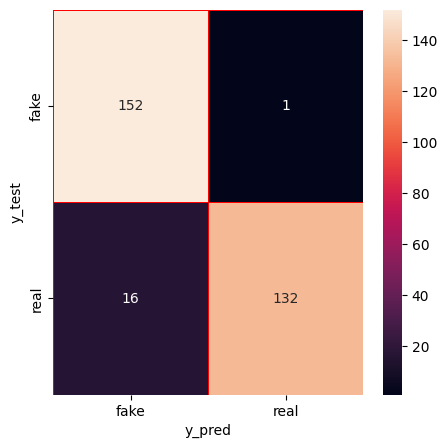

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

Neive bayes

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [37]:
clf = MultinomialNB()

In [38]:
clf.fit(X_train, y_train)

MultinomialNB()

In [39]:
y_pred1 = clf.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.946843853820598


In [41]:

cm= confusion_matrix(y_test, y_pred1)
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

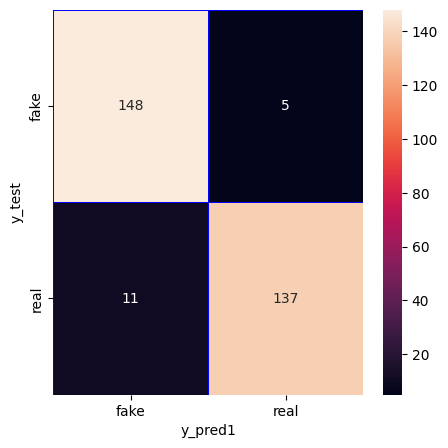

In [42]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(conf_matrix_df,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax)

plt.xlabel("y_pred1")
plt.ylabel("y_test")
plt.show()

LSTM

In [43]:
# from tensorflow.keras.layers import LSTM

In [44]:

import tensorflow as tf